# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.7 which is incompatible.


In [2]:
!pip install segment_tree

The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [3]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [6]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    #print(type(action))
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [35]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [2]:
import numpy as np
import random
from collections import namedtuple, deque

import torch
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt

import pdb
from collections import namedtuple, deque

import pandas as pd

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
class QNetwork(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed, device):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
        """
        super(QNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.device = device
        "*** YOUR CODE HERE ***"
        self.fc1 = nn.Linear(state_size, 64)
        self.fc2 = nn.Linear(64, action_size)

    def forward(self, state):
        """Build a network that maps state -> action values."""
        x = state
        if not isinstance(x, torch.Tensor):
            x = torch.tensor(x, device=self.device, dtype=torch.float32)
            x = x.unsqueeze(0)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        #x = F.softmax(x, dim=0)
        #pdb.set_trace()
        
        return x


In [27]:
class FCDuelingQ(nn.Module):
    #def __init__(self, input_dim, output_dim, hidden_dims=(32,32), activation_fc=F.relu):
    def __init__(self, input_dim, output_dim, seed):#hidden_dims=(64), activation_fc=F.relu):
        super(FCDuelingQ, self).__init__()
        self.seed = torch.manual_seed(seed)
        #self.activation_fc = activation_fc

        
        #self.input_layer = nn.Linear(input_dim, hidden_dims[0])
        #self.hidden_layers = nn.ModuleList()
        #for i in range(len(hidden_dims)-1):
        #    hidden_layer = nn.Linear(hidden_dims[i], hidden_dims[i+1])
        #    self.hidden_layers.append(hidden_layer)

        #value function
        #self.value_output = nn.Linear(hidden_dims[-1], 1)
        # advantage function
        #self.advantage_output = nn.Linear(hidden_dims[-1], output_dim)
        self.seed = torch.manual_seed(seed)
        "*** YOUR CODE HERE ***"
        self.fc1 = nn.Linear(state_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.advantage1 = nn.Linear(64, 256) # 512
        self.advantage2 = nn.Linear(256, action_size)
        self.value1 = nn.Linear(64, 256) # 512
        self.value2 = nn.Linear(256, 1)
        
    def forward(self, state):
        #pdb.set_trace()
        x = state
        #pdb.set_trace()
        if not isinstance(x, torch.Tensor):
            x = torch.tensor(x, device=self.device, dtype=torch.float32)
            x = x.unsqueeze(0)
            
        #x = self.activation_fc(self.input_layer(x))
        
        #for hidden_layer in self.hidden_layers:
        #    x = self.activation_fc(hidden_layer(x))
        
        #pdb.set_trace()
        x= F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
            
        a1 = F.relu(self.advantage1(x))
        a2 = self.advantage2(a1)
        
        v1 = F.relu(self.value1(x))
        v2 = self.value2(v1)
        
        v2 = v2.expand_as(a2)
        q_adv = v2 + a2 - a2.mean(0, keepdim=True).expand_as(a2)
        #pdb.set_trace()
        return q_adv

Test of network

In [28]:
state_size = len(env_info.vector_observations[0])
fc1 = nn.Linear(state_size, 32)
fc2 = nn.Linear(32, action_size)
state = env_info.vector_observations[0]
state = torch.from_numpy(state).float()
x = F.relu(fc1(state))
x = fc2(x)
x = F.softmax(x, dim=0)
x

tensor([ 0.2594,  0.2077,  0.2762,  0.2567])

In [29]:
x = F.softmax(x, dim=0)
x

tensor([ 0.2523,  0.2396,  0.2565,  0.2516])

In [30]:
x.shape

torch.Size([4])

In [31]:
torch.argmax(x).cpu().data.numpy()

array(2)

In [32]:
torch.argmax(x).data.numpy()

array(2)

Test of softmax with temperature for argmax selection.

In [33]:
min_temp =0.01
init_temp = 1000
e = np.array([0,100, 500, 1000,5000])
temp = 1 - e/(0.04*1000)
print(temp)
temp *= init_temp - min_temp
print(temp)
temp += min_temp
print(temp)
temp = np.clip(temp, min_temp, init_temp)
print(temp)

[   1.    -1.5  -11.5  -24.  -124. ]
[    999.99    -1499.985  -11499.885  -23999.76  -123998.76 ]
[   1000.      -1499.975  -11499.875  -23999.75  -123998.75 ]
[  1.00000000e+03   1.00000000e-02   1.00000000e-02   1.00000000e-02
   1.00000000e-02]


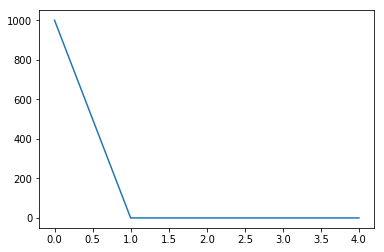

In [34]:
plt.plot(np.clip(temp, min_temp, init_temp))

In [11]:
episodes = np.arange(1000)
slow = np.maximum(1000*np.exp(-episodes/45), 0.01)
fast = np.maximum(1000*np.exp(-episodes/15), 0.01)

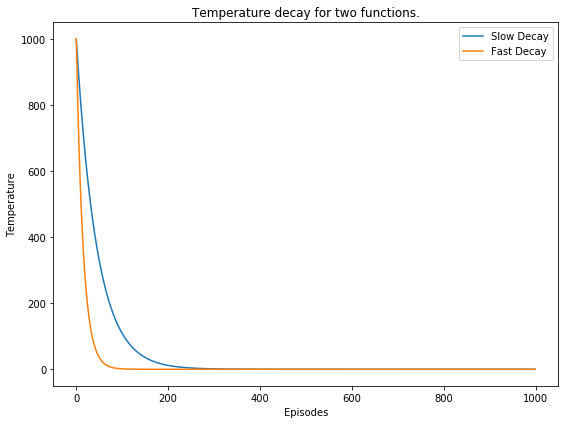

In [19]:

fix, ax = plt.subplots(1,1, figsize=(8,6))
plt.plot(episodes, slow, label="Slow Decay")
plt.plot(episodes, fast, label="Fast Decay")
ax.set_ylabel("Temperature")
ax.set_xlabel("Episodes")
ax.set_title("Temperature decay for two functions.")
ax.legend()
plt.tight_layout()

In [36]:
temp = 1
Q = np.array([0,4.45,4.55])
scaled_Q = Q/temp
print(scaled_Q)
norm_Q = scaled_Q - np.max(scaled_Q)
print(norm_Q)
exp_Q = np.exp(norm_Q)
print(exp_Q)
probs = exp_Q/np.sum(exp_Q)
print(probs)

[ 0.    4.45  4.55]
[-4.55 -0.1   0.  ]
[ 0.0105672   0.90483742  1.        ]
[ 0.00551696  0.47240014  0.5220829 ]


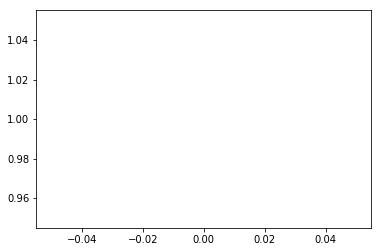

In [37]:
plt.plot(np.clip(temp, min_temp, init_temp))

In [41]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 64         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR = 5e-4               # learning rate 
UPDATE_EVERY = 4        # how often to update the network

class Agent():
    def __init__(self, state_size, action_size, seed):
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(seed)
        self.counter = 0
        
        #Q -network
        self.qnetwork_local = QNetwork(state_size, action_size, seed, device).to(device)
        self.qnetwork_target = QNetwork(state_size, action_size, seed, device).to(device)
        #self.qnetwork_local = FCDuelingQ(state_size, action_size, seed).to(device)
        #self.qnetwork_target = FCDuelingQ(state_size, action_size, seed).to(device)
        
        self.optimizer = optim.Adam(self.qnetwork_local.parameters(), lr=LR)
        
        self.t_step = 0
        
        # Replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, seed)
        #self.memory = PrioritizedReplayBuffer(BUFFER_SIZE, BATCH_SIZE, seed)
        
        # Initialize time step (for updating every UPDATE_EVERY steps)
        self.t_step = 0
        
    def act(self, state, eps):
        # .from_numpy() -> tensor, .float() -> 64 -> 32 (weights are 32)
        state = torch.from_numpy(state).float()
        self.qnetwork_local.eval()
        with torch.no_grad():
            action_values = self.qnetwork_local(state)
        self.qnetwork_local.train()
        
        if random.random() < eps:
            action = np.random.randint(self.action_size)
        else:
            # action_values to tensor
            action = torch.argmax(action_values).cpu().data.numpy().item()
        return action

    def act_softmax(self, state, temperature):
        state = torch.from_numpy(state).float()
        self.qnetwork_local.eval()
        with torch.no_grad():
            action_values = self.qnetwork_local(state)
        self.qnetwork_local.train()
        #pdb.set_trace()
        action_values = action_values.cpu().data.numpy()#.item()
        scaled_Q = action_values/temperature
        #pdb.set_trace()*
        norm_Q = scaled_Q - np.max(scaled_Q) # for numerical stability
        exp_Q = np.exp(norm_Q)
        probs = exp_Q / np.sum(exp_Q)
        
        action = np.random.choice(np.arange(len(probs)), size=1, p=probs)[0]
        return action
    
    
    def step2(self, state, action, reward, next_state, done):
        self.counter += 1
        state = torch.from_numpy(state).float()
        next_state = torch.from_numpy(next_state).float()
        q_targets = reward - GAMMA*self.qnetwork_local(next_state)
        q_expected = self.qnetwork_local(state)
        
        #self.reward + self.gamma*self.qnetwork_local(next_state) - self.qnetwork_local(state)
        loss = F.mse_loss(q_expected, q_targets)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
        if self.counter >= UPDATE_EVERY:
            
            tau=0.1
            self.counter = 0
            for target_param, local_param in zip(self.qnetwork_local.parameters(), self.qnetwork_target.parameters()):
                target_param.data.copy_(TAU*local_param.data + (1.0-TAU)*target_param.data)
        
    def step(self, state, action, reward, next_state, done):
        # Save experience in replay memory
        self.memory.add(state, action, reward, next_state, done)
        
        # Learn every UPDATE_EVERY time steps.
        self.t_step = (self.t_step + 1) % UPDATE_EVERY
        if self.t_step == 0:
            # If enough samples are available in memory, get random subset and learn
            if len(self.memory) > BATCH_SIZE:
                experiences = self.memory.sample()
                self.learn(experiences, GAMMA)
                #self.learn_dqn(experiences, GAMMA)
                
    def step_prio_exp_replay(self, state, action, reward, next_state, done):
        # Save experience in replay memory
        #self.memory.add(state, action, reward, next_state, done)
        self.memory.store((state, action, reward, next_state, done))
        
        # Learn every UPDATE_EVERY time steps.
        self.t_step = (self.t_step + 1) % UPDATE_EVERY
        if self.t_step == 0:
            # If enough samples are available in memory, get random subset and learn
            if len(self.memory) > BATCH_SIZE:
                #pdb.set_trace()
                idxs, weights, experiences = self.memory.sample()
                self.learn_prio_exp_replay(idxs, weights, experiences, GAMMA)
                #self.learn_dqn(experiences, GAMMA)
                
    def learn_prio_exp_replay(self, idxs, weights, experiences, gamma):
        """Update value parameters using given batch of experience tuples.

        Params
        ======
            experiences (Tuple[torch.Variable]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones = experiences
        
        rewards = torch.tensor(rewards, dtype=torch.float32)
        #actions = torch.tensor(actions, dtype=torch.float32)
        actions = torch.from_numpy(actions).long()
        dones = torch.from_numpy(dones.astype(np.uint8)).float()
        weights = torch.tensor(weights, dtype=torch.float32)
        

        ## TODO: compute and minimize the loss
        "*** YOUR CODE HERE ***"
        # Get max predicted Q values (for next states) from target model
        #pdb.set_trace()
        #Q_targets_next = self.qnetwork_target(next_states).detach().max(1)[0]#.unsqueeze(1)
        #Q_targets_next = self.qnetwork_target(next_states).squeeze(0).detach().max(1)[0]#.unsqueeze(1)
        Q_targets_next = self.qnetwork_target(next_states).squeeze(0).detach().max(1)[0].unsqueeze(1)
        # Compute Q targets for current states 
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))

        # Get expected Q values from local model
        Q_expected = self.qnetwork_local(states).squeeze(0).gather(1, actions)
    
        # Compute loss
        #pdb.set_trace()
        td_error = Q_targets - Q_expected
        #pdb.set_trace()
        loss = (weights*td_error).pow(2).mul(0.5).mean()
        #loss = F.mse_loss(Q_expected, Q_targets)
        # Minimize the loss
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
        # update priorites of the replayed batch using the abs TD errors
        priorities = np.abs(td_error.detach().cpu().numpy())
        self.memory.update(idxs, priorities)
        
        

        # ------------------- update target network ------------------- #
        self.soft_update(self.qnetwork_local, self.qnetwork_target, TAU)
                
    def learn(self, experiences, gamma):
        """Update value parameters using given batch of experience tuples.

        Params
        ======
            experiences (Tuple[torch.Variable]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones = experiences

        ## TODO: compute and minimize the loss
        "*** YOUR CODE HERE ***"
        # Get max predicted Q values (for next states) from target model
        #pdb.set_trace()
        Q_targets_next = self.qnetwork_target(next_states).detach().max(1)[0].unsqueeze(1)
        # Compute Q targets for current states 
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))

        # Get expected Q values from local model
        Q_expected = self.qnetwork_local(states).gather(1, actions)

        # Compute loss
        loss = F.mse_loss(Q_expected, Q_targets)
        # Minimize the loss
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # ------------------- update target network ------------------- #
        self.soft_update(self.qnetwork_local, self.qnetwork_target, TAU)
        
    def learn_dqn(self, experiences, gamma):
        """Update value parameters using given batch of experience tuples.

        Params
        ======
            experiences (Tuple[torch.Variable]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones = experiences

        ## TODO: compute and minimize the loss
        "*** YOUR CODE HERE ***"
        # Get max predicted Q values (for next states) from target model
        #pdb.set_trace()
        #pdb.set_trace()
        #Q_targets_next = self.qnetwork_target(next_states).detach().max(1)[0].unsqueeze(1)
        # get q action values from target qnetork
        Q_targets_next = self.qnetwork_target(next_states).detach()
        
        # get actions with max Q from local qnetwork
        argmax_action_qlocals_next_state = self.qnetwork_local(next_states).detach().max(1)[1].unsqueeze(1)
        
        # choose q values from q "targets" with argmax action values from q "local"
        Q_targets_next_ddqn = Q_targets_next.gather(1, argmax_action_qlocals_next_state)
        
        # Compute Q targets for current states 
        Q_targets = rewards + (gamma * Q_targets_next_ddqn * (1 - dones))

        # Get expected Q values from local model
        Q_expected = self.qnetwork_local(states).gather(1, actions)

        # Compute loss
        loss = F.mse_loss(Q_expected, Q_targets)
        # Minimize the loss
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # ------------------- update target network ------------------- #
        self.soft_update(self.qnetwork_local, self.qnetwork_target, TAU)
        
    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            local_model (PyTorch model): weights will be copied from
            target_model (PyTorch model): weights will be copied to
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)
        
class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object.

        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            seed (int): random seed
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
  
        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)
        
        

In [42]:
class PrioritizedReplayBuffer:
    #def __init__(self, action_size, buffer_size, batch_size, seed):
    def __init__(self, 
                 max_samples=10_000, # buffer_size
                 batch_size=64, # batch_size
                 rank_based=False,
                 alpha=0.6, 
                 beta0=0.1, 
                 beta_rate=0.99992):
        self.max_samples = max_samples
        self.memory = np.empty(shape=(self.max_samples, 4), dtype=np.ndarray) #2
        self.batch_size = batch_size
        self.n_entries = 0
        self.next_index = 0
        self.td_error_index = 0
        self.sample_index = 1
        self.rank_based = rank_based # if not rank_based, then proportional
        self.alpha = alpha # how much prioritization to use 0 is uniform (no priority), 1 is full priority
        self.beta = beta0 # bias correction 0 is no correction 1 is full correction
        self.beta0 = beta0 # beta0 is just beta's initial value
        self.beta_rate = beta_rate

    def update(self, idxs, td_errors):
        # insert td errors into the right place
        #pdb.set_trace()
        self.memory[idxs, self.td_error_index] = np.abs(td_errors)
        # for rank based
        if self.rank_based:
            sorted_arg = self.memory[:self.n_entries, self.td_error_index].argsort()[::-1]
            self.memory[:self.n_entries] = self.memory[sorted_arg]

    def store(self, sample):
        #pdb.set_trace()
        priority = 1.0
        # compute priority of sample
        if self.n_entries > 0:
            priority = self.memory[:self.n_entries, self.td_error_index].max()
        # insert priority and samle into the buffer
        self.memory[self.next_index, self.td_error_index] = priority
        self.memory[self.next_index, self.sample_index] = np.array(sample)
        # number of experiences in the buffer
        self.n_entries = min(self.n_entries + 1, self.max_samples)
        # at which index will the experience be inserted
        self.next_index += 1
        self.next_index = self.next_index % self.max_samples

    def _update_beta(self):
        self.beta = min(1.0, self.beta * self.beta_rate**-1)
        return self.beta

    def sample(self, batch_size=None):
        # compute batch size
        batch_size = self.batch_size if batch_size == None else batch_size
        # anneal beta
        self._update_beta()
        # remove zeroed rows from entries
        entries = self.memory[:self.n_entries]
        # compute priorities
        if self.rank_based:
            priorities = 1/(np.arange(self.n_entries) + 1)
        else: # proportional
            priorities = entries[:, self.td_error_index] + EPS
        # compute probabilites
        scaled_priorities = priorities**self.alpha        
        probs = np.array(scaled_priorities/np.sum(scaled_priorities), dtype=np.float64)
        # importance sampling weights 
        weights = (self.n_entries * probs)**-self.beta
        # normalize weights
        normalized_weights = weights/weights.max()
        # sample indices using the probs
        idxs = np.random.choice(self.n_entries, batch_size, replace=False, p=probs)
        # get the samples
        #pdb.set_trace()
        samples = np.array([entries[idx] for idx in idxs])
        # stack samples by ids, weights and experience tuples
        samples_stacks = [np.vstack(batch_type) for batch_type in np.vstack(samples[:, self.sample_index]).T]
        idxs_stack = np.vstack(idxs)
        weights_stack = np.vstack(normalized_weights[idxs])
        return idxs_stack, weights_stack, samples_stacks

    def __len__(self):
        return self.n_entries
    
    def __repr__(self):
        return str(self.memory[:self.n_entries])
    
    def __str__(self):
        return str(self.memory[:self.n_entries])

Add boltzman polity with temperature parameter that is decaying. See page 86 in the book.

In [43]:
env_info = env.reset(train_mode=True)[brain_name]
n_episodes=1000
max_t=1000
eps_start=1.0
eps_end = 0.01 #0.01
eps_decay = 0.999#0.995
scores = []
scores_window = deque(maxlen=100)
eps = eps_start
max_score = 0
agent = Agent(len(env_info.vector_observations[0]), brain.vector_action_space_size, 42)
temp = 1000
# load the weights from file
#agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))
for i_episode in range(n_episodes):
    #print(f"i_episode: {i_episode}")
    env.reset()
    state = env_info.vector_observations[0]
    score = 0
    for t in range(max_t):
        #print(f"t: {t}")
        #print(f"score: {score}")
        #action = agent.act(state, eps)
        action = agent.act_softmax(state, temp)
        #print(action)
        #print(type(action))
        env_info = env.step(action)[brain_name]
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]
        agent.step(state, action, reward, next_state, done)
        #agent.step_prio_exp_replay(state, action, reward, next_state, done)
        state = next_state
        score += reward
        if done:
            break
    scores_window.append(score)
    scores.append(score)
    #temp = np.maximum(1000*np.exp(-i_episode/45), 0.01)
    temp = np.maximum(1000*np.exp(-i_episode/15), 0.01)
    if score > max_score:
        max_score = score
    eps = max(eps_end, eps_decay*eps)
    if i_episode % 1 == 0:
        msg = (f"Episode: {i_episode}, Average Score: {np.mean(scores_window):.1f}, Current Score: {score:.1f}, "
              f"Max Score: {max_score:.1f}, eps: {eps:.2f}, t: {t:.0f}, temp: {temp:.2f}")
        print(msg)


Episode: 0, Average Score: 0.0, Current Score: 0.0, Max Score: 0.0, eps: 1.00, t: 299, temp: 1000.00
Episode: 1, Average Score: 0.5, Current Score: 1.0, Max Score: 1.0, eps: 1.00, t: 299, temp: 935.51
Episode: 2, Average Score: 0.0, Current Score: -1.0, Max Score: 1.0, eps: 1.00, t: 299, temp: 875.17
Episode: 3, Average Score: 0.0, Current Score: 0.0, Max Score: 1.0, eps: 1.00, t: 299, temp: 818.73
Episode: 4, Average Score: 0.2, Current Score: 1.0, Max Score: 1.0, eps: 1.00, t: 299, temp: 765.93
Episode: 5, Average Score: 0.2, Current Score: 0.0, Max Score: 1.0, eps: 0.99, t: 299, temp: 716.53
Episode: 6, Average Score: 0.1, Current Score: 0.0, Max Score: 1.0, eps: 0.99, t: 299, temp: 670.32
Episode: 7, Average Score: 0.1, Current Score: 0.0, Max Score: 1.0, eps: 0.99, t: 299, temp: 627.09
Episode: 8, Average Score: 0.2, Current Score: 1.0, Max Score: 1.0, eps: 0.99, t: 299, temp: 586.65
Episode: 9, Average Score: 0.6, Current Score: 4.0, Max Score: 4.0, eps: 0.99, t: 299, temp: 548.8

In [44]:
torch.save(agent.qnetwork_local.state_dict(), 'model.pt')

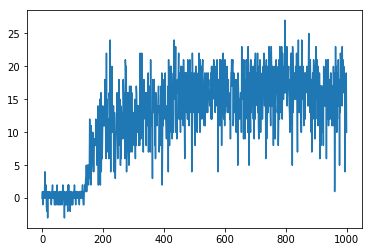

In [45]:
plt.plot(scores)

Which setting were used

In [25]:
settings = {}
settings["info"] = "replay, soft_update, DQN, softmax, temp_decrease faster, prio exp replay"
settings["min_eps"] = eps_end
settings["eps_decay"] = eps_decay
settings["max_t"] = max_t
settings["nn_ll"] = "states, 64, actions"
settings["buffer_size"] = BUFFER_SIZE
settings["batch_size"] = BATCH_SIZE
settings["gamma"] = GAMMA
settings["tau"] = TAU
settings["LR"] = LR
settings["update_every"] = UPDATE_EVERY
settings["score"] = scores
settings["score_ave_last_100"] = np.mean(scores_window)
settings["temp"] = "temp = np.maximum(1000*np.exp(-i_episode/15), 0.01)"


Save the settings as a dataframe object

In [26]:
df_res = pd.DataFrame({7:settings})
df_res

,7
LR,0.0005
batch_size,64
buffer_size,100000
eps_decay,0.999
gamma,0.99
info,"replay, soft_update, DQN, softmax, temp_decrea..."
max_t,1000
min_eps,0.01
nn_ll,"states, 64, actions"
score,"[1.0, 1.0, -2.0, 0.0, 2.0, 0.0, 1.0, 0.0, -1.0..."


Read in pickle file with saved dataframes with previous results

In [4]:
df = pd.read_pickle(r'output.pkl')
print(df.keys())

dict_keys(['test1', 'test2_ddqn', 'test2_ddqn_min_eps0_01', 'test3_dqn_min_eps0_01', 'test4_dueling_dqn_min_eps0_01', 'test5_dqn_softmax', 'test6_dqn_softmax_faster_temp_drop', 'test7_dqn_softmax_faster_temp_drop_prio_exp_replay'])


Save new dataframe in a dictionary

In [28]:
#sum_dict = {}
name = "test7_dqn_softmax_faster_temp_drop_prio_exp_replay" # needs to be changed!!!!!!!!!!
if name in df.keys():
    raise Exception("Name of dataframe is already in the dataframe!\nChange name or make sure the same dataframe isnt already saved")
df[name] = df_res

In [29]:
df

{'test1':                                                                     0
 LR                                                             0.0005
 batch_size                                                         64
 buffer_size                                                    100000
 eps_decay                                                       0.995
 gamma                                                            0.99
 info                                              replay, soft_update
 max_t                                                            1000
 min_eps                                                           0.1
 nn_ll                                             states, 64, actions
 score               [-1.0, -1.0, -1.0, 0.0, 1.0, 0.0, 3.0, -2.0, -...
 score_ave_last_100                                              12.73
 tau                                                             0.001
 update_every                                                       

Save dictionary with dataframes to disk as a pickle file

In [30]:
import pickle
file_to_write = open("output.pkl", "wb")

pickle.dump(df, file_to_write)

In [22]:
df.keys()

dict_keys(['test1', 'test2_ddqn', 'test2_ddqn_min_eps0_01', 'test3_dqn_min_eps0_01', 'test4_dueling_dqn_min_eps0_01', 'test5_dqn_softmax'])

In [5]:
olle = pd.DataFrame({})
for key in df.keys():
    print(key)
    print(len(df[key].loc["score",:].tolist()[0]))
    olle[key] = df[key].loc["score",:].tolist()[0][:1000]
    

test1
1007
test2_ddqn
1000
test2_ddqn_min_eps0_01
1000
test3_dqn_min_eps0_01
1000
test4_dueling_dqn_min_eps0_01
1000
test5_dqn_softmax
1000
test6_dqn_softmax_faster_temp_drop
1000
test7_dqn_softmax_faster_temp_drop_prio_exp_replay
1000


Score results for all the different methods tested.

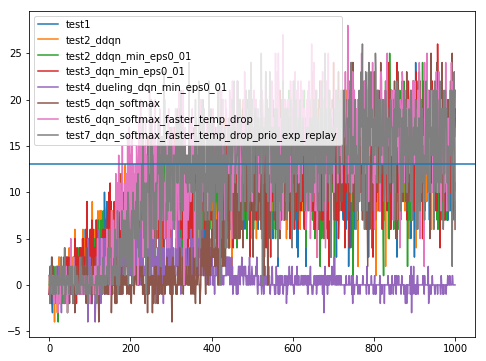

In [6]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
olle.plot(ax=ax)
ax.axhline(y=13)
plt.show()
plt.tight_layout()

Rolling 100 mean scores for the different methods.

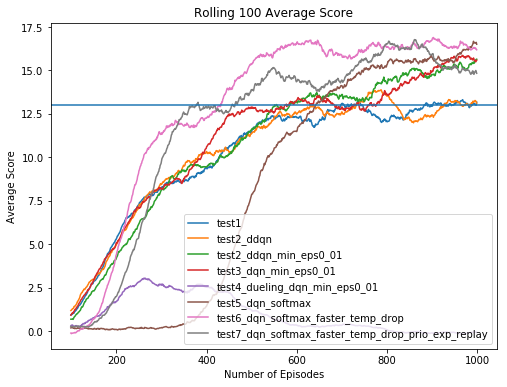

In [7]:


fig, ax = plt.subplots(1,1, figsize=(8,6))
olle.rolling(100).mean().plot(ax=ax)
ax.axhline(y=13)
ax.set_xlabel("Number of Episodes")
ax.set_ylabel("Average Score")
ax.set_title("Rolling 100 Average Score")
plt.show()
plt.tight_layout()


Rolling 100 standard deviation of the scores from the different methods.

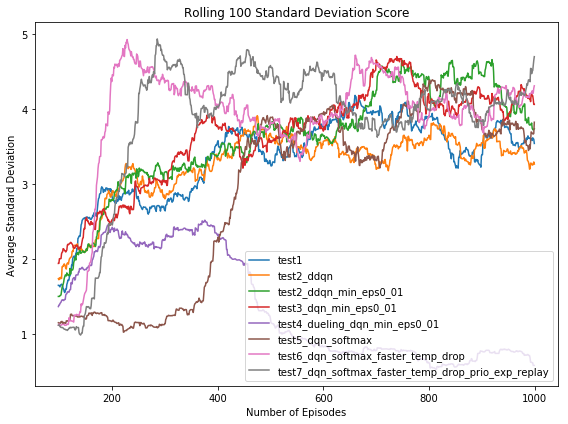

In [9]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
olle.rolling(100).std().plot(ax=ax)
#ax.axhline(y=13)
#plt.show()
ax.set_xlabel("Number of Episodes")
ax.set_ylabel("Average Standard Deviation")
ax.set_title("Rolling 100 Standard Deviation Score")
plt.tight_layout()

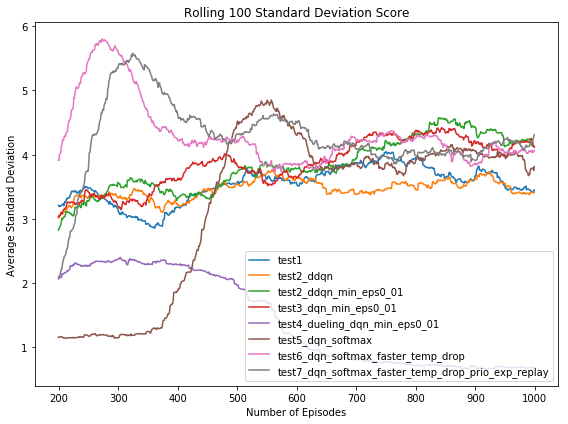

In [24]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
olle.rolling(200).std().plot(ax=ax)
#ax.axhline(y=13)
#plt.show()
ax.set_xlabel("Number of Episodes")
ax.set_ylabel("Average Standard Deviation")
ax.set_title("Rolling 100 Standard Deviation Score")
plt.tight_layout()